In [ ]:
#Importing modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Importing custom modules
import ci_analysis as cia
import temp_ci_analysis as tcia

## 0 Data Preparation
Requires the index, epidemiology and oxford-government-response csv files in a folder "data"

In [2]:
#Import general indexing file
indexing = pd.read_csv("data/index.csv")

#Import general epidemiology data
epidemiology = pd.read_csv("data/epidemiology.csv")

In [3]:
#Read file containing the government response
oxford_stringency = pd.read_csv("data/oxford-government-response.csv")

In [4]:
#Reduce epidemiology data to Belgium
epidemiology_BE = epidemiology[epidemiology["location_key"] == "BE"]

#Print categories of epidemiology data for orientation
print(epidemiology_BE.columns)

#Figure out the start and end date of the epidemiology data
epidemiology_BE_start, epidemiology_BE_end = epidemiology_BE['date'].iloc[1], epidemiology_BE['date'].iloc[-1]
print("Start:", epidemiology_BE_start, "End:", epidemiology_BE_end)

Index(['date', 'location_key', 'new_confirmed', 'new_deceased',
       'new_recovered', 'new_tested', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested'],
      dtype='object')
Start: 2020-01-02 End: 2022-09-15


In [5]:
#Reduce Oxford stringency data to Belgium
oxford_BE = oxford_stringency[oxford_stringency['location_key'] =='BE']

#Print out categories of Oxford stringency data for orientation
print(oxford_BE.columns)

#Figure out the start and end date of the Oxford stringency data
oxford_BE_start, oxford_BE_end = oxford_BE['date'].iloc[1], oxford_BE['date'].iloc[-1]
print("Start:", oxford_BE_start, "End:", oxford_BE_end)

#Align epidemiology data accordingly
epidemiology_BE_time_corrected = epidemiology_BE.copy()[
    (epidemiology_BE['date'] >= oxford_BE_start) &
    (epidemiology_BE['date'] <= oxford_BE_end)
]

Index(['date', 'location_key', 'school_closing', 'workplace_closing',
       'cancel_public_events', 'restrictions_on_gatherings',
       'public_transport_closing', 'stay_at_home_requirements',
       'restrictions_on_internal_movement', 'international_travel_controls',
       'income_support', 'debt_relief', 'fiscal_measures',
       'international_support', 'public_information_campaigns',
       'testing_policy', 'contact_tracing',
       'emergency_investment_in_healthcare', 'investment_in_vaccines',
       'facial_coverings', 'vaccination_policy', 'stringency_index'],
      dtype='object')
Start: 2020-01-02 End: 2022-07-08


In [6]:
#Check shapes
print(epidemiology_BE_time_corrected.shape)
print(oxford_BE.shape)

#Check if the dates are aligned for shorted version due to different shapes
comparison = epidemiology_BE_time_corrected['date'].values == oxford_BE['date'].values[1:]
print(comparison.sum()) #Sum for True should equal length of epidemiology_BE_time_corrected

#Adapt length of Oxford stringency data
oxford_BE_time_corrected = oxford_BE.copy()[1:]
print(oxford_BE_time_corrected.shape)

#Final check
comparison = epidemiology_BE_time_corrected['date'].values == oxford_BE_time_corrected['date'].values
print(comparison.sum())

(919, 10)
(920, 22)
919
(919, 22)
919


In [7]:
#Examine which methods were applied (and changed) by calculating the mean (integers mean no change troughout time period)
print(oxford_BE_time_corrected.iloc[1:, 2:].mean())

#Drop the column 'international_support' as no changes were observed there
oxford_BE_time_corrected = oxford_BE_time_corrected.drop(columns=['international_support'])

school_closing                        9.716776e-01
workplace_closing                     1.787582e+00
cancel_public_events                  1.379085e+00
restrictions_on_gatherings            2.909586e+00
public_transport_closing              1.742919e-02
stay_at_home_requirements             7.647059e-01
restrictions_on_internal_movement     2.069717e-01
international_travel_controls         2.905229e+00
income_support                        1.437908e+00
debt_relief                           9.324619e-01
fiscal_measures                       2.541830e+07
international_support                 0.000000e+00
public_information_campaigns          1.942266e+00
testing_policy                        2.283224e+00
contact_tracing                       1.810458e+00
emergency_investment_in_healthcare    2.772551e+06
investment_in_vaccines                2.987745e+04
facial_coverings                      2.335512e+00
vaccination_policy                    2.556645e+00
stringency_index               

In [8]:
#faciliate names
BE_epi = epidemiology_BE_time_corrected.copy()
BE_response = oxford_BE_time_corrected.copy()

In [9]:
# BE_epi.to_csv('BE_epi.csv', index=False)
# BE_response.to_csv('BE_response.csv', index=False)

In [10]:
#Examine which data is available
print(BE_epi.iloc[1:, 2:].mean())

new_confirmed           4.700793e+03
new_deceased            3.487582e+01
new_recovered                    NaN
new_tested              4.080334e+04
cumulative_confirmed    1.273985e+06
cumulative_deceased     1.944163e+04
cumulative_recovered             NaN
cumulative_tested       1.432672e+07
dtype: float64


### 1 Analysing

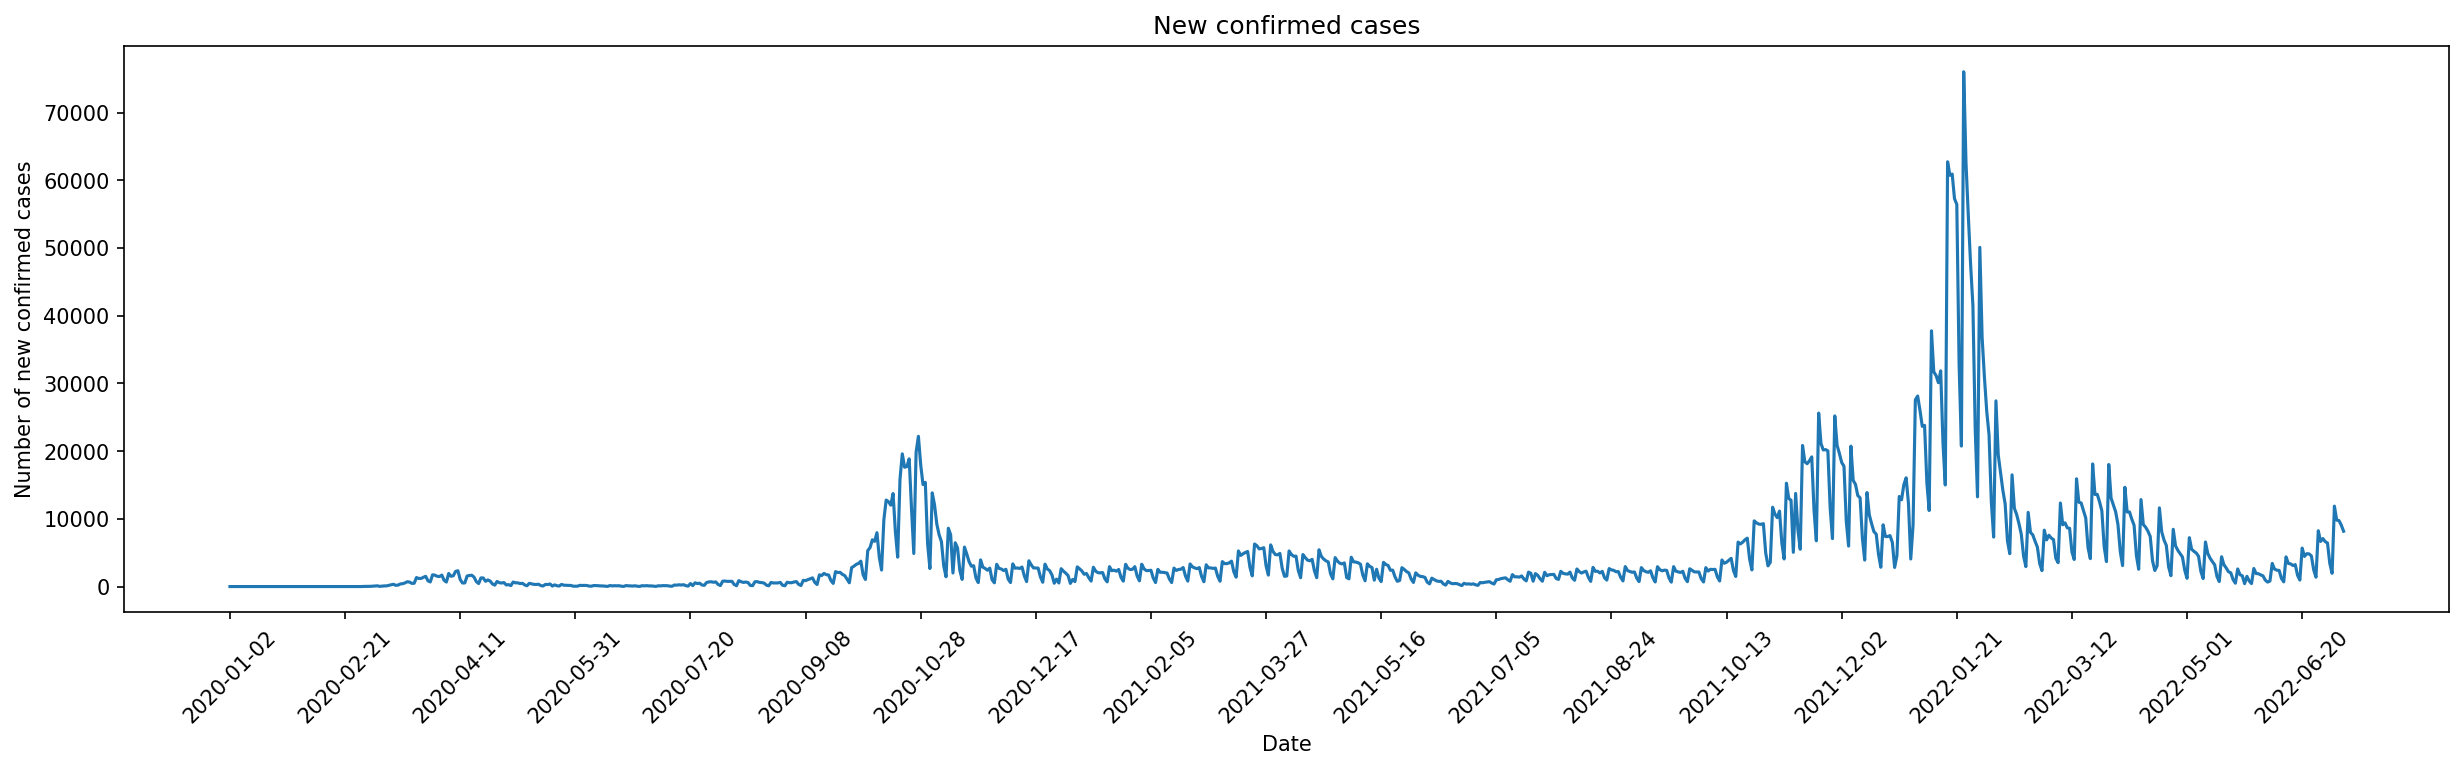

In [11]:
# Overview of new confirmed cases
plt.figure(figsize=(20, 5), dpi=150)
plt.plot(BE_epi['date'], BE_epi['new_confirmed'])
plt.title('New confirmed cases')
plt.xlabel('Date')
plt.ylabel('Number of new confirmed cases')
plt.xticks(rotation=45)
ax = plt.gca()
current_ticks = ax.get_xticks()
ax.set_xticks(current_ticks[::50])
plt.show()

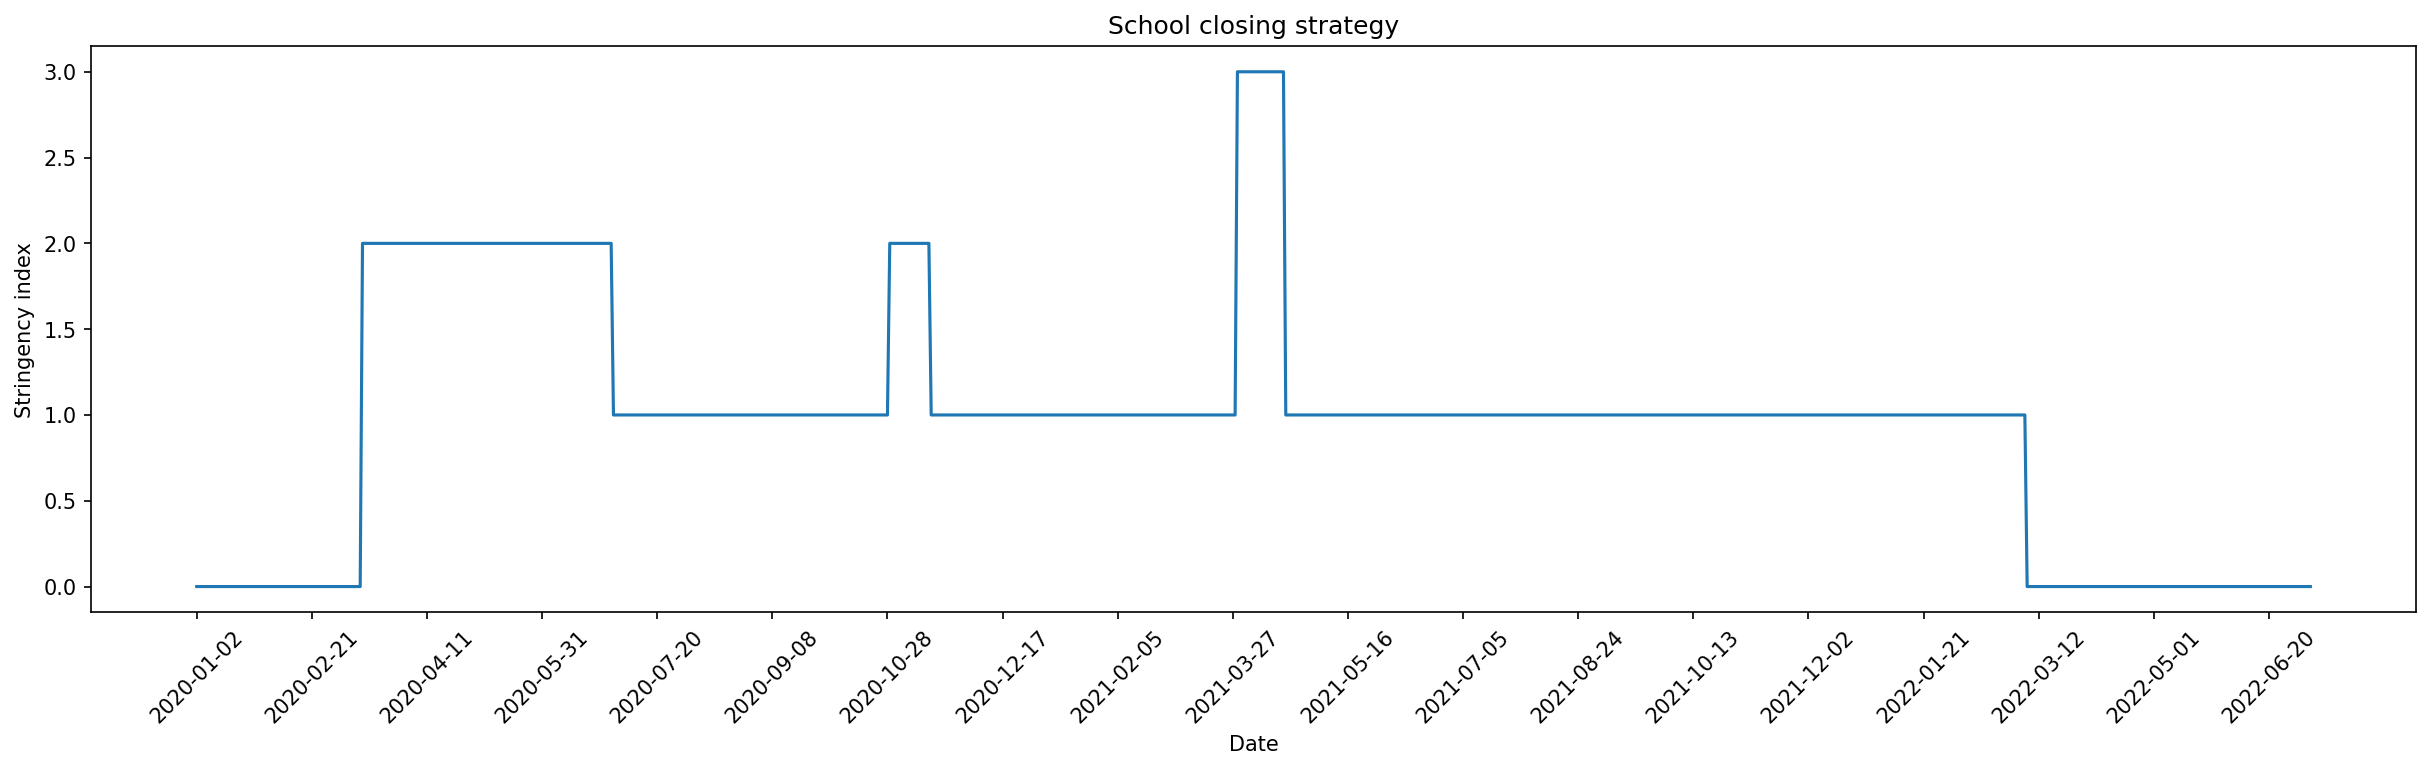

In [12]:
# Overview of school closing strategy
plt.figure(figsize=(20, 5), dpi=150)
plt.plot(BE_epi['date'], BE_response['school_closing'])
plt.title('School closing strategy')
plt.xlabel('Date')
plt.ylabel('Stringency index')
plt.xticks(rotation=45)
ax = plt.gca()
current_ticks = ax.get_xticks()
ax.set_xticks(current_ticks[::50])
plt.show()

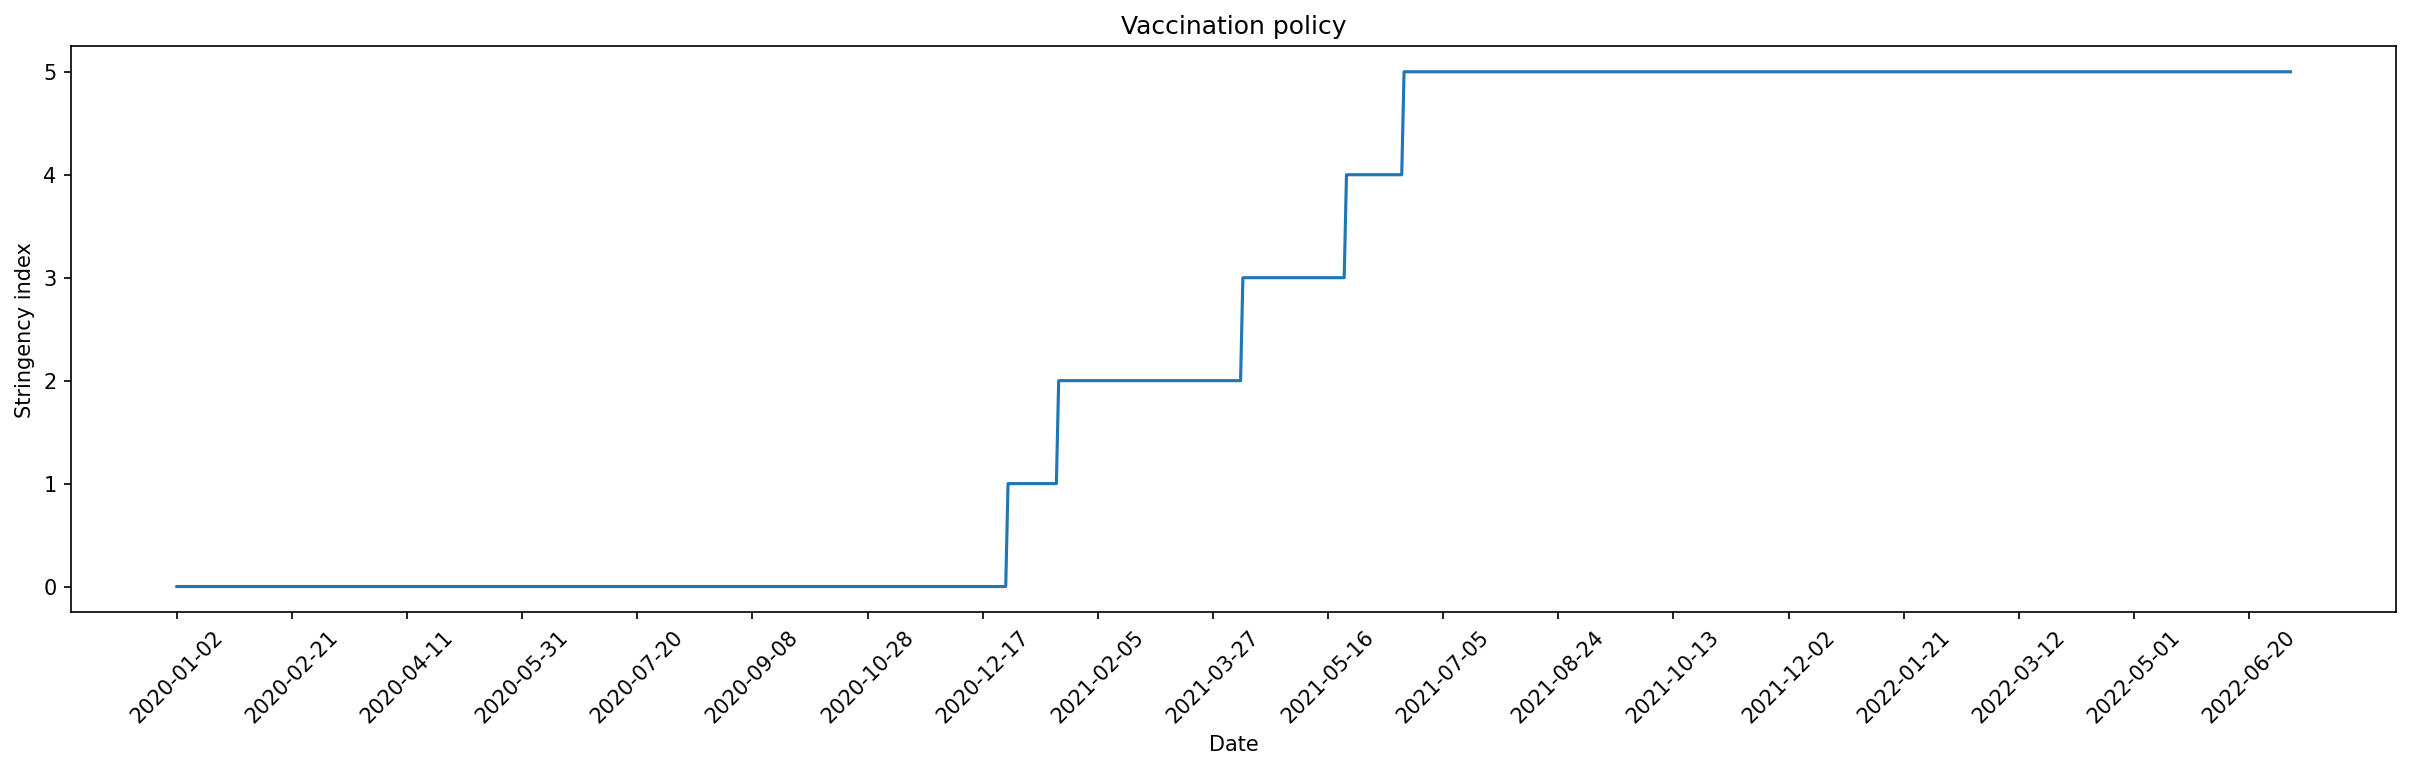

In [13]:
# Overview of vaccination policy
plt.figure(figsize=(20, 5), dpi=150)
plt.plot(BE_epi['date'], BE_response['vaccination_policy'])
plt.title('Vaccination policy')
plt.xlabel('Date')
plt.ylabel('Stringency index')
plt.xticks(rotation=45)
ax = plt.gca()
current_ticks = ax.get_xticks()
ax.set_xticks(current_ticks[::50])
plt.show()

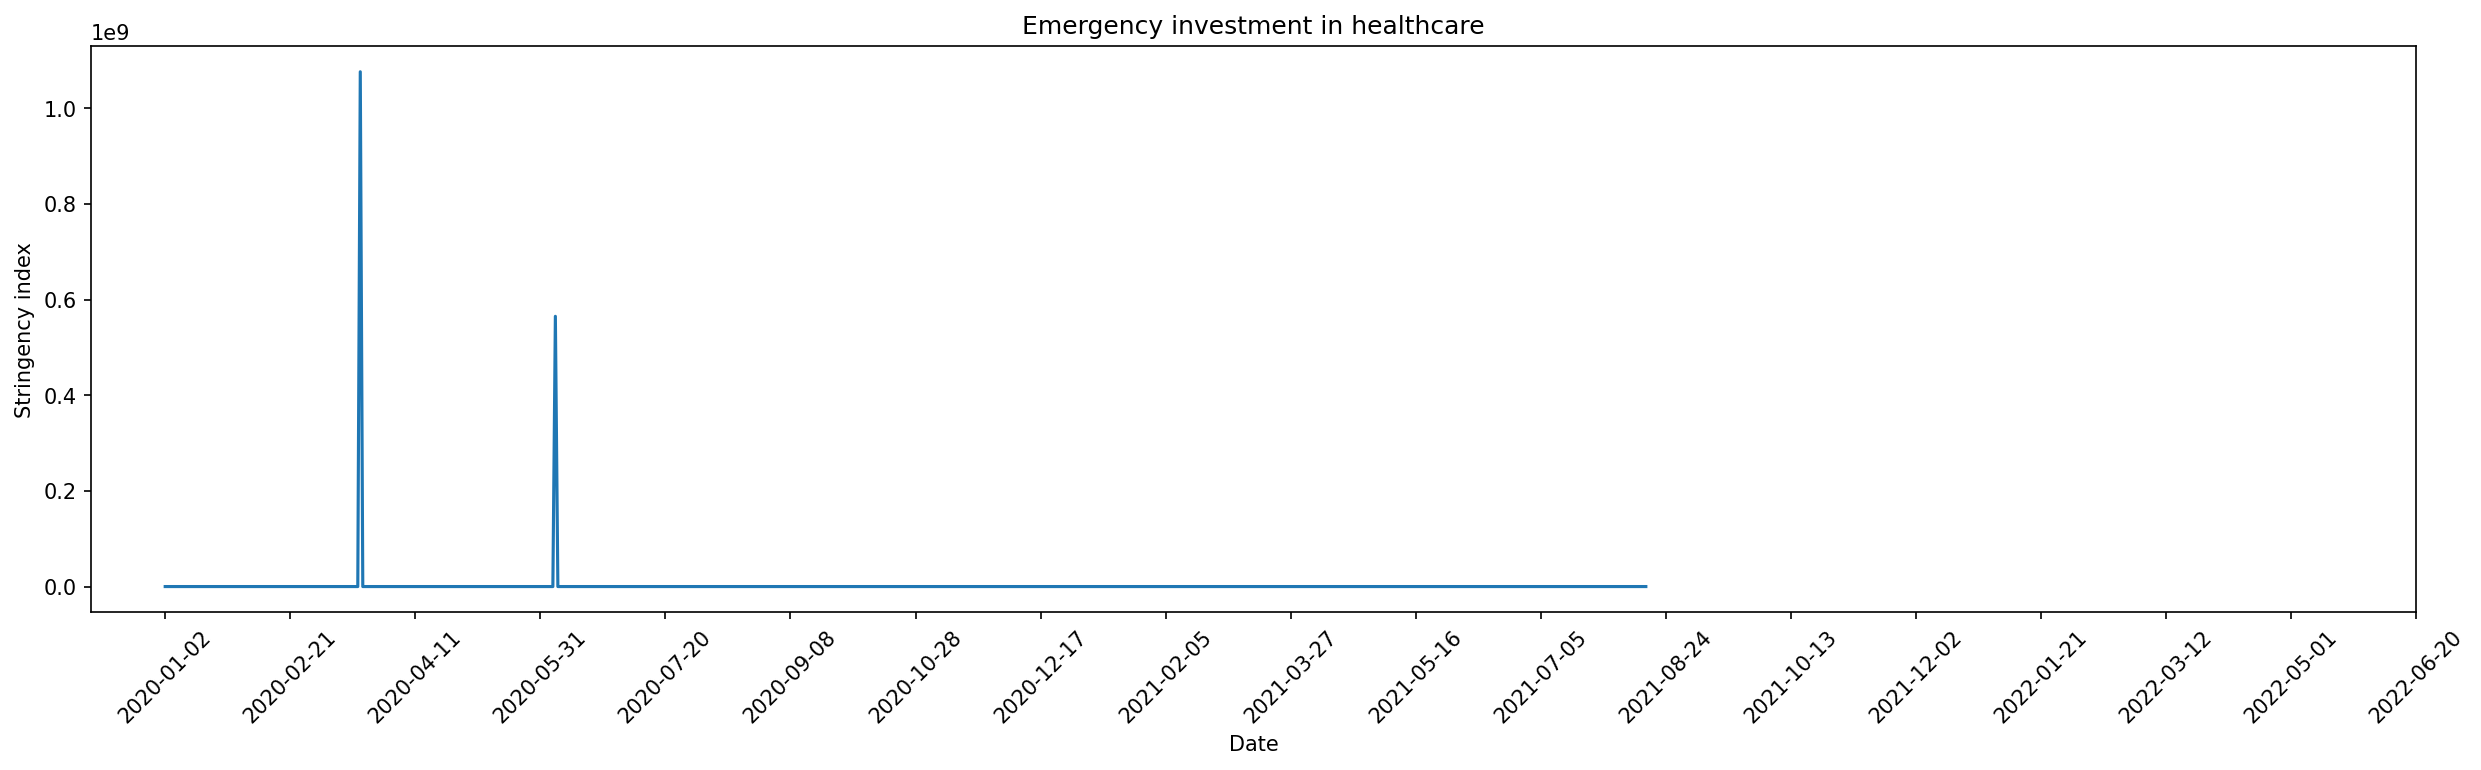

In [14]:
# Overview of emergency investment in healthcare
plt.figure(figsize=(20, 5), dpi=150)
plt.plot(BE_epi['date'], BE_response['emergency_investment_in_healthcare'])
plt.title('Emergency investment in healthcare')
plt.xlabel('Date')
plt.ylabel('Stringency index')
plt.xticks(rotation=45)
ax = plt.gca()
current_ticks = ax.get_xticks()
ax.set_xticks(current_ticks[::50])
plt.show()

#### School closing

Without explicit notion of time:
Change points: [ 71 180 300 318 451 472 794]


/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    2445.78            322843.0
Prediction (s.d.)         2852.23 (1127.25)  376494.59 (148796.84)
95% CI                    [664.36, 5083.09]  [87695.33, 670968.22]

Absolute effect (s.d.)    -406.45 (1127.25)  -53651.59 (148796.84)
95% CI                    [-2637.31, 1781.42][-348125.22, 235147.67]

Relative effect (s.d.)    -14.25% (39.52%)   -14.25% (39.52%)
95% CI                    [-92.46%, 62.46%]  [-92.46%, 62.46%]

Posterior tail-area probability p: 0.38
Posterior prob. of a causal effect: 62.24%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 2445.78. In the absence of an
intervention, we would have expected an average response of 2852.23.
The 95% interval of this counterfactual prediction is [664.36, 5083.09].
Subtractin

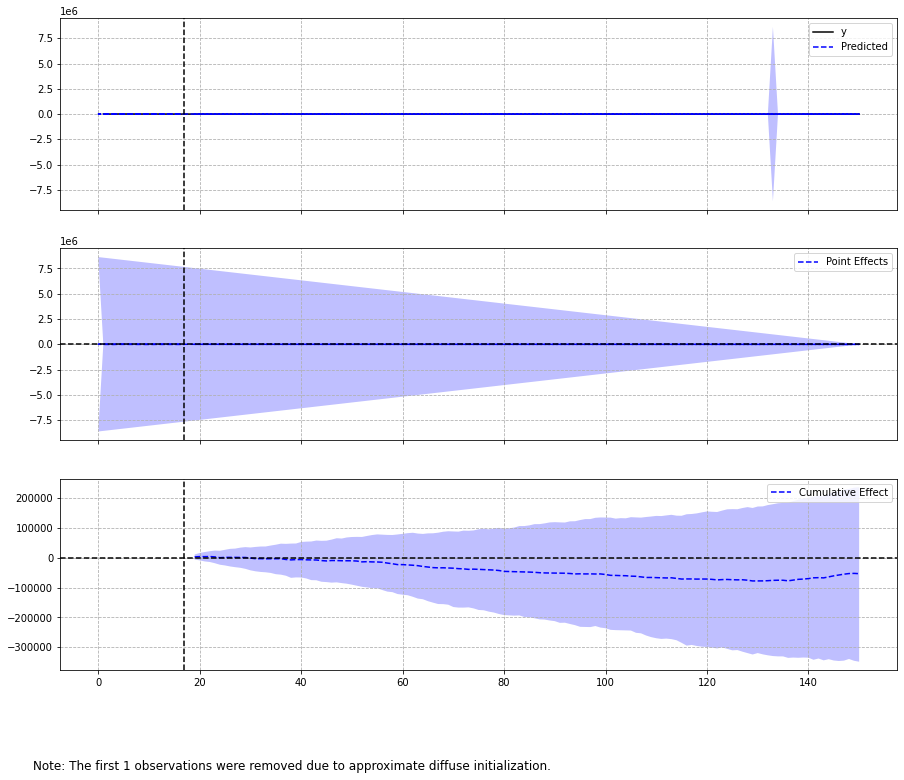

With explicit notion of time:
Change points: [ 71 180 300 318 451 472 794]


/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    2445.78            322843.0
Prediction (s.d.)         7049.69 (1104.29)  930559.53 (145766.15)
95% CI                    [4763.5, 9092.23]  [628782.03, 1200174.82]

Absolute effect (s.d.)    -4603.91 (1104.29) -607716.53 (145766.15)
95% CI                    [-6646.45, -2317.72][-877331.82, -305939.03]

Relative effect (s.d.)    -65.31% (15.66%)   -65.31% (15.66%)
95% CI                    [-94.28%, -32.88%] [-94.28%, -32.88%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 2445.78. By contrast, in the absence of an
intervention, we would have expected an average response of 7049.69.
The 95% interval of this counterfactual prediction is [4763.5, 90

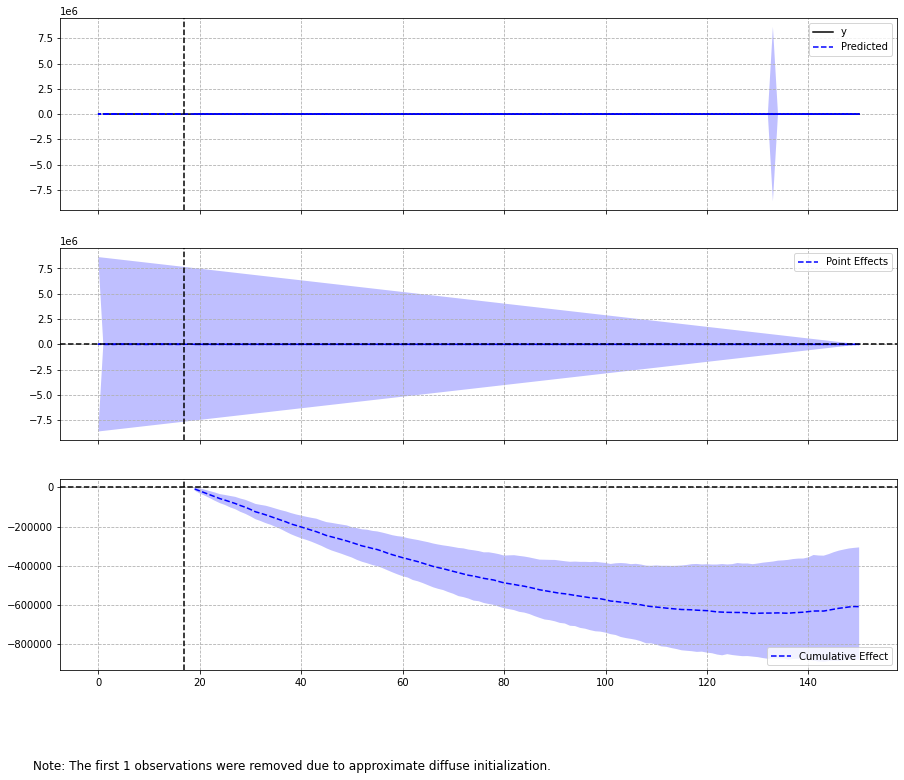

In [15]:
#Examined change point:
test_change_pt = 3

print("Without explicit notion of time:")
change_points, ci_objects = cia.causal_impact_analysis(BE_epi['new_confirmed'], BE_response['school_closing'], all_change_pts=False, results_out=True, debug_out=False, change_pt=test_change_pt)

print("With explicit notion of time:")
t_change_points, t_ci_objects = tcia.time_causal_impact_analysis(BE_epi['new_confirmed'], BE_response['school_closing'], all_change_pts=False, results_out=True, debug_out=False, change_pt=test_change_pt)

Including shift of 7 to 10 days due incubation time and delay in confirming infection

Without explicit notion of time:
Change points: [ 71 180 300 318 451 472 794]


/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    2545.17            335962.0
Prediction (s.d.)         1412.26 (576.62)   186417.8 (76113.91)
95% CI                    [303.89, 2564.2]   [40113.67, 338474.7]

Absolute effect (s.d.)    1132.91 (576.62)   149544.2 (76113.91)
95% CI                    [-19.04, 2241.28]  [-2512.7, 295848.33]

Relative effect (s.d.)    80.22% (40.83%)    80.22% (40.83%)
95% CI                    [-1.35%, 158.7%]   [-1.35%, 158.7%]

Posterior tail-area probability p: 0.03
Posterior prob. of a causal effect: 97.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 2545.17. In the absence of an
intervention, we would have expected an average response of 1412.26.
The 95% interval of this counterfactual prediction is [303.89, 2564.2].
Subtracting this predi

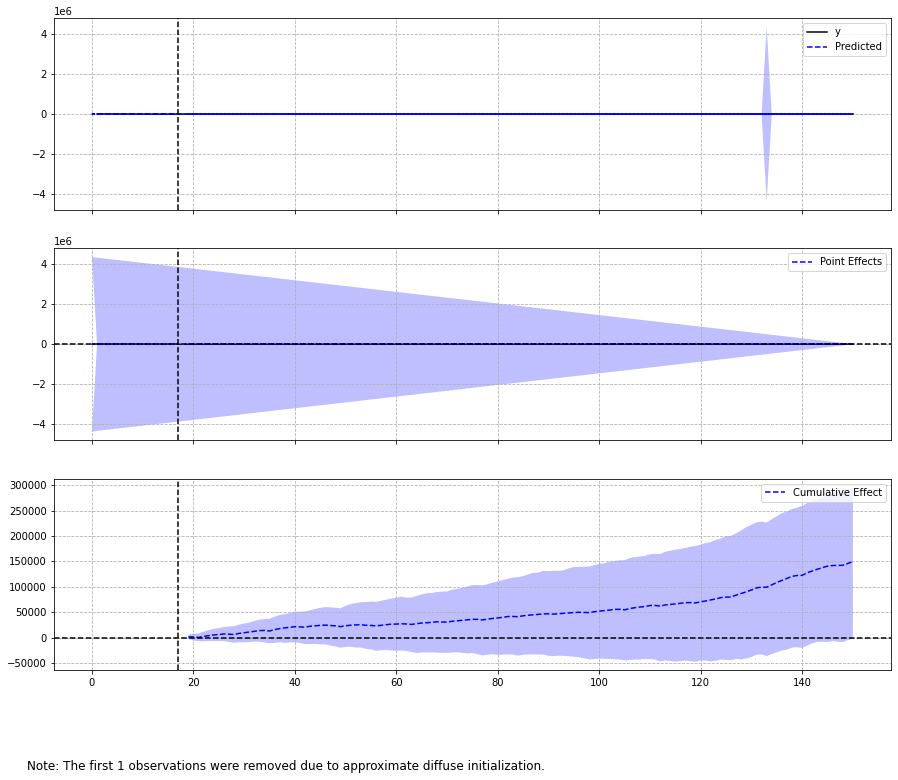

With explicit notion of time:
Change points: [ 71 180 300 318 451 472 794]


/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    2545.17            335962.0
Prediction (s.d.)         3648.27 (589.95)   481571.78 (77872.79)
95% CI                    [2436.64, 4749.19] [321636.81, 626892.56]

Absolute effect (s.d.)    -1103.1 (589.95)   -145609.78 (77872.79)
95% CI                    [-2204.02, 108.52] [-290930.56, 14325.19]

Relative effect (s.d.)    -30.24% (16.17%)   -30.24% (16.17%)
95% CI                    [-60.41%, 2.97%]   [-60.41%, 2.97%]

Posterior tail-area probability p: 0.04
Posterior prob. of a causal effect: 96.3%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 2545.17. In the absence of an
intervention, we would have expected an average response of 3648.27.
The 95% interval of this counterfactual prediction is [2436.64, 4749.19].
Subtracting 

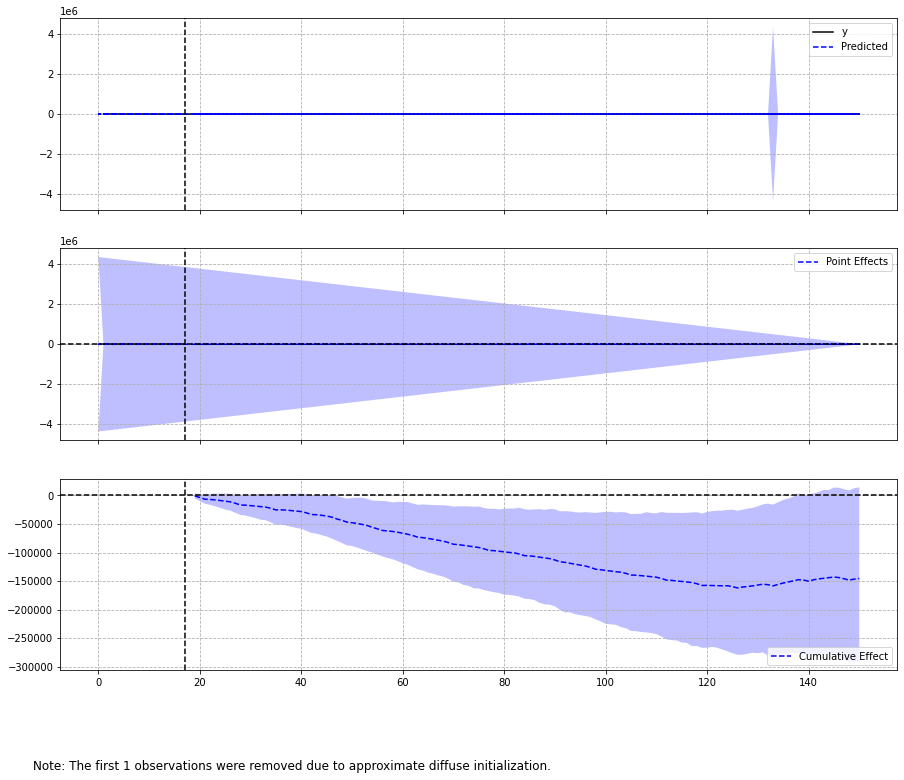

In [16]:
#Shift to close gap between measure and effect of measure
shift = 10

#Examined change point:
test_change_pt = 3

print("Without explicit notion of time:")
change_points, ci_objects = cia.causal_impact_analysis(BE_epi['new_confirmed'][shift:], BE_response['school_closing'][:-shift], all_change_pts=False, results_out=True, debug_out=False, change_pt=test_change_pt)

print("With explicit notion of time:")
t_change_points, t_ci_objects = tcia.time_causal_impact_analysis(BE_epi['new_confirmed'][shift:], BE_response['school_closing'][:-shift], all_change_pts=False, results_out=True, debug_out=False, change_pt=test_change_pt)

#### Vaccination Policy

Without explicit notion of time:
Change points: [360 382 462 507 532]


/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1157.33            27776.0
Prediction (s.d.)         1917.47 (332.31)   46019.29 (7975.52)
95% CI                    [1216.22, 2518.87] [29189.34, 60452.82]

Absolute effect (s.d.)    -760.14 (332.31)   -18243.29 (7975.52)
95% CI                    [-1361.53, -58.89] [-32676.82, -1413.34]

Relative effect (s.d.)    -39.64% (17.33%)   -39.64% (17.33%)
95% CI                    [-71.01%, -3.07%]  [-71.01%, -3.07%]

Posterior tail-area probability p: 0.02
Posterior prob. of a causal effect: 98.4%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1157.33. By contrast, in the absence of an
intervention, we would have expected an average response of 1917.47.
The 95% interval of this counterfactual prediction is [1216.22, 2518.87].
Subtra

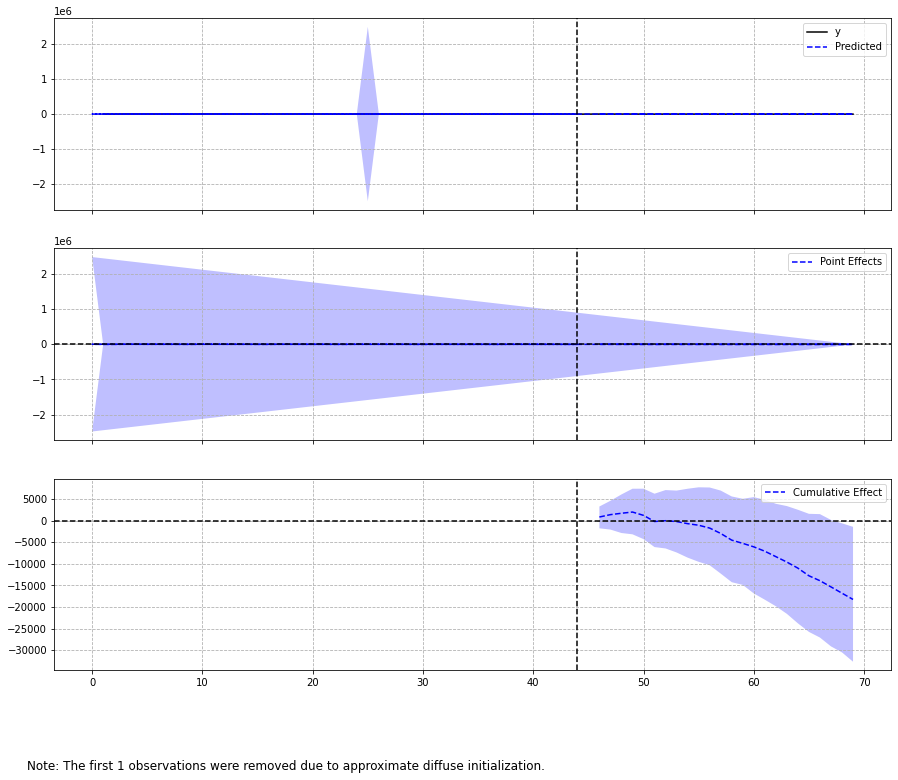

With explicit notion of time:
Change points: [360 382 462 507 532]


/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1157.33            27776.0
Prediction (s.d.)         404.17 (280.39)    9700.01 (6729.32)
95% CI                    [-122.1, 977.01]   [-2930.32, 23448.14]

Absolute effect (s.d.)    753.17 (280.39)    18075.99 (6729.32)
95% CI                    [180.33, 1279.43]  [4327.86, 30706.32]

Relative effect (s.d.)    186.35% (69.37%)   186.35% (69.37%)
95% CI                    [44.62%, 316.56%]  [44.62%, 316.56%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 99.4%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1157.33. By contrast, in the absence of an
intervention, we would have expected an average response of 404.17.
The 95% interval of this counterfactual prediction is [-122.1, 977.01].
Subtracting t

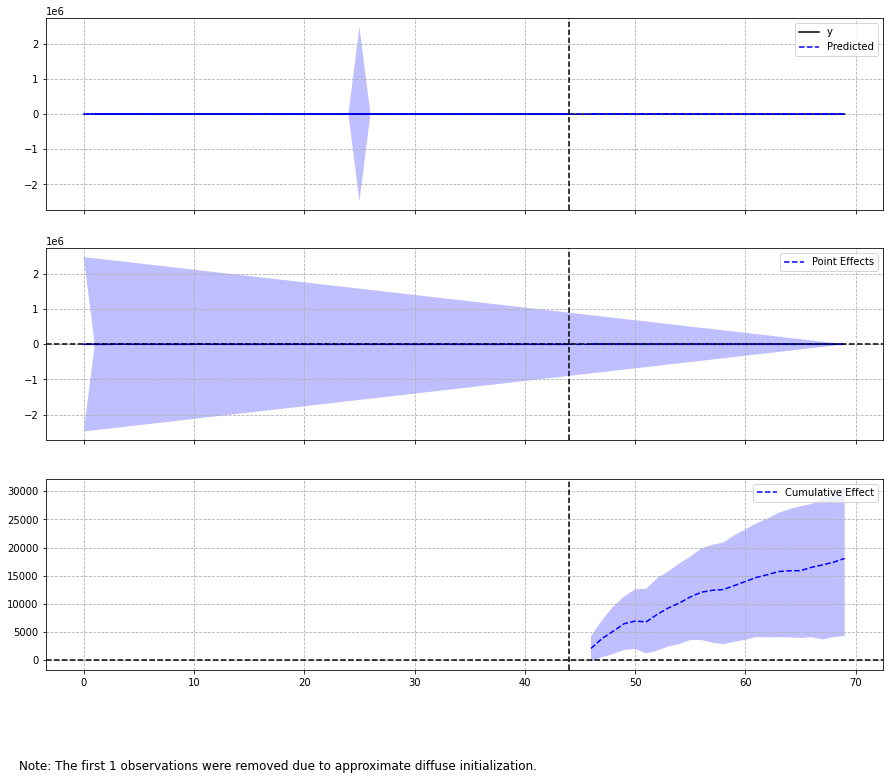

In [17]:
#Examined change point:
test_change_pt = 3

print("Without explicit notion of time:")
change_points, ci_objects = cia.causal_impact_analysis(BE_epi['new_confirmed'], BE_response['vaccination_policy'], all_change_pts=False, results_out=True, debug_out=False, change_pt=test_change_pt)

print("With explicit notion of time:")
t_change_points, t_ci_objects = tcia.time_causal_impact_analysis(BE_epi['new_confirmed'], BE_response['vaccination_policy'], all_change_pts=False, results_out=True, debug_out=False, change_pt=test_change_pt)

Include large shift until vaccination might have effect (which not includes the gap between policy and implementation)

Without explicit notion of time:
Change points: [360 382 462 507 532]


/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    894.17             21460.0
Prediction (s.d.)         1153.33 (263.14)   27679.96 (6315.24)
95% CI                    [623.64, 1655.12]  [14967.46, 39722.76]

Absolute effect (s.d.)    -259.17 (263.14)   -6219.96 (6315.24)
95% CI                    [-760.95, 270.52]  [-18262.76, 6492.54]

Relative effect (s.d.)    -22.47% (22.82%)   -22.47% (22.82%)
95% CI                    [-65.98%, 23.46%]  [-65.98%, 23.46%]

Posterior tail-area probability p: 0.16
Posterior prob. of a causal effect: 83.52%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 894.17. In the absence of an
intervention, we would have expected an average response of 1153.33.
The 95% interval of this counterfactual prediction is [623.64, 1655.12].
Subtracting this predi

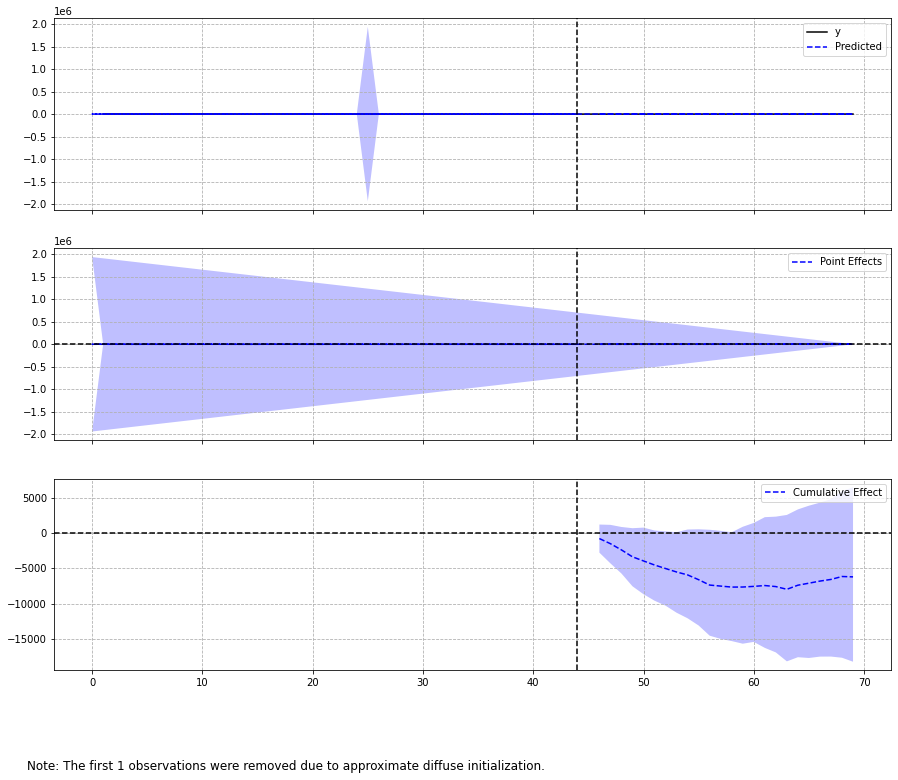

With explicit notion of time:
Change points: [360 382 462 507 532]


/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    894.17             21460.0
Prediction (s.d.)         -1493.64 (204.28)  -35847.26 (4902.65)
95% CI                    [-1901.15, -1100.4][-45627.66, -26409.64]

Absolute effect (s.d.)    2387.8 (204.28)    57307.26 (4902.65)
95% CI                    [1994.57, 2795.32] [47869.64, 67087.66]

Relative effect (s.d.)    -159.87% (13.68%)  -159.87% (13.68%)
95% CI                    [-187.15%, -133.54%][-187.15%, -133.54%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 894.17. By contrast, in the absence of an
intervention, we would have expected an average response of -1493.64.
The 95% interval of this counterfactual prediction is [-1901.15, -1100.4].

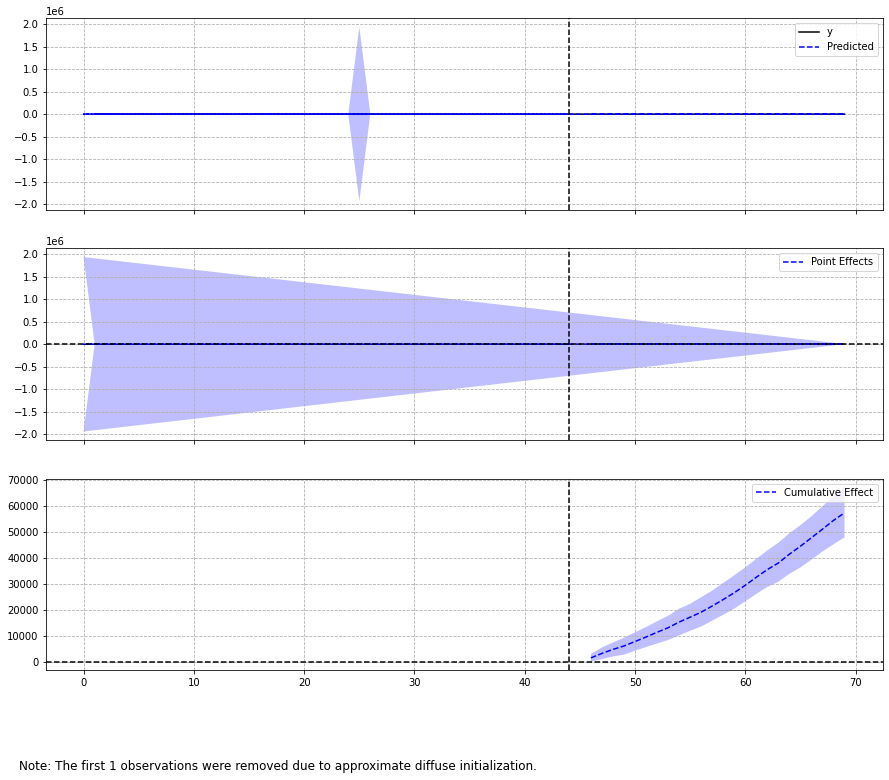

In [18]:
#Shift to close gap between measure and effect of measure
shift = 30

#Examined change point:
test_change_pt = 3

print("Without explicit notion of time:")
change_points, ci_objects = cia.causal_impact_analysis(BE_epi['new_confirmed'][shift:], BE_response['vaccination_policy'][:-shift], all_change_pts=False, results_out=True, debug_out=False, change_pt=test_change_pt)

print("With explicit notion of time:")
t_change_points, t_ci_objects = tcia.time_causal_impact_analysis(BE_epi['new_confirmed'][shift:], BE_response['vaccination_policy'][:-shift], all_change_pts=False, results_out=True, debug_out=False, change_pt=test_change_pt)

### 2 Further Tries

There is the need to better implement the dynamics, as CausalImpact does not see the dynamics (often suggesting that would be less without intervention). Thus, the possibility for multitask learning arises. I tried to use a "cheap" MLP for learning a representation - first on time and school closing together, but didn't work out (too less data and time).

In [19]:
import mlp_representation as mlpr
import torch

Training Epochs:   0%|          | 0/50 [00:00<?, ?it/s]/Users/tobiasrospel/opt/anaconda3/envs/uc_cod/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([919])) that is different to the input size (torch.Size([919, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training Epochs: 100%|██████████| 50/50 [00:00<00:00, 249.35it/s]


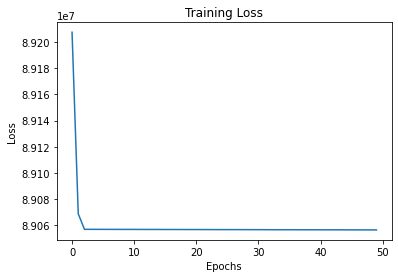

In [20]:
# Hyperparameters
input_dim = 2           # atm 2 features: time and school closing
hidden_dims = [64, 64, 1]  # Three hidden layers with 64, 64, and 1 neurons respectively
output_dim = 1           #1 output (new confirmed)
learning_rate = 0.001
num_epochs = 50

# Create an instance of the MLP model
model = mlpr.MLP(input_dim, hidden_dims, output_dim)

confirm, school = BE_epi['new_confirmed'].values, torch.tensor(BE_response['school_closing'].values, dtype=torch.float32)
t = torch.arange(len(confirm), dtype=torch.float32)

input = torch.stack((t, school), dim=1)
target = torch.tensor(confirm, dtype=torch.float32)

# Train the model
model.train_model(input, target, learning_rate, num_epochs)